In [1]:
import numpy as np
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit,LeaveOneOut,KFold
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import extract_vector as ev
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
arousal_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
arousal_label = ev.getLabelData(type="arousal")

valence_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
valence_label = ev.getLabelData(type="valence")

dominance_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
dominance_label = ev.getLabelData(type="dominance")

liking_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
liking_label = ev.getLabelData(type="liking")

In [3]:
arousal_dataset = arousal_dataset.astype(float)
arousal_label = arousal_label.astype(float)

valence_dataset = valence_dataset.astype(float)
valence_label = valence_label.astype(float)

dominance_dataset = dominance_dataset.astype(float)
dominance_label = dominance_label.astype(float)

liking_dataset = liking_dataset.astype(float)
liking_label = liking_label.astype(float)

In [4]:
def getLabel(label):
    new_label=[]
    for i in range(len(label)):
        if(label[i][0]>=4.5):
            new_label.append(1)
        else:
            new_label.append(0)
    return new_label

In [5]:
# clean data
def clean_data(dataset, target):
    del_rows = []
    for i in range(len(dataset)):
        if(np.isnan(dataset[i]).sum() > 0):
            del_rows.append(i)
            
    dataset = np.delete(dataset, del_rows, axis=0)
    target = np.delete(target, del_rows, axis=0)
    
    return dataset,target

In [6]:
arousal_dataset,arousal_label = clean_data(arousal_dataset,arousal_label)
valence_dataset,valence_label = clean_data(valence_dataset,valence_label)
dominance_dataset ,dominance_label = clean_data(dominance_dataset,dominance_label)
liking_dataset,liking_label = clean_data(liking_dataset,liking_label)

In [7]:
arousal_label = getLabel(arousal_label)
valence_label = getLabel(valence_label)
dominance_label = getLabel(dominance_label)
liking_label = getLabel(liking_label)

In [8]:
print(arousal_dataset.shape)

(755, 126)


In [9]:
sm1 = SMOTE()
arousal_dataset,arousal_label = sm1.fit_resample(arousal_dataset,arousal_label)

sm2 = SMOTE()
valence_dataset,valence_label = sm2.fit_resample(valence_dataset,valence_label)

sm3 = SMOTE()
dominance_dataset,dominance_label = sm3.fit_resample(dominance_dataset,dominance_label)

sm4 = SMOTE()
liking_dataset,liking_label = sm4.fit_resample(liking_dataset,liking_label)

In [10]:
sc = StandardScaler()

arousal_dataset = sc.fit_transform(arousal_dataset)
valence_dataset = sc.fit_transform(valence_dataset)
dominance_dataset = sc.fit_transform(dominance_dataset)
liking_dataset = sc.fit_transform(liking_dataset)

In [11]:
pca = PCA(n_components=0.95)

arousal_dataset = pca.fit_transform(arousal_dataset)
valence_dataset = pca.fit_transform(valence_dataset)
dominance_dataset = pca.fit_transform(dominance_dataset)
liking_dataset = pca.fit_transform(liking_dataset)

In [12]:
ar_model = SVC(kernel="rbf",C = 10)
val_model = SVC(kernel="rbf",C = 10)
dom_model = SVC(kernel="rbf",C = 10)
lik_model = SVC(kernel="rbf",C = 10)

In [13]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(arousal_dataset,arousal_label,test_size=0.2,random_state=42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(valence_dataset,valence_label,test_size=0.2,random_state=42)
x_d_train,x_d_test,y_d_train,y_d_test = train_test_split(dominance_dataset,dominance_label,test_size = 0.3,random_state = 42)
x_l_train,x_l_test,y_l_train,y_l_test = train_test_split(liking_dataset,liking_label,test_size = 0.3,random_state = 42)

## Arousal

In [14]:
ar_model.fit(x_a_train,y_a_train)

SVC(C=10)

In [15]:
pred_a = ar_model.predict(x_a_test)
print(classification_report(y_a_test,pred_a))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.84      0.75      0.79       108

    accuracy                           0.79       208
   macro avg       0.80      0.79      0.79       208
weighted avg       0.80      0.79      0.79       208



In [16]:
confusion_matrix(y_a_test,pred_a)

array([[84, 16],
       [27, 81]], dtype=int64)

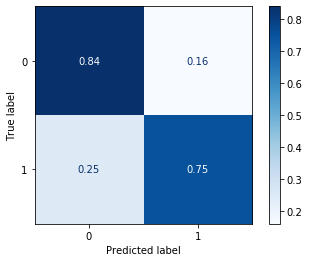

In [17]:
plot_confusion_matrix(ar_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

In [18]:
print(accuracy_score(pred_a,y_a_test))

0.7932692307692307


### K Fold Cross Validation:-

In [19]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(ar_model,arousal_dataset,arousal_label,scoring='accuracy',cv=cvkfold).mean()*100

77.10610932475885

### Leave One Out Cross Validation:-

In [20]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(arousal_dataset)
no_splits

1036

In [21]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(ar_model,arousal_dataset,arousal_label,scoring='accuracy',cv=cvloocv).mean()*100

76.88208419719675

## Valence

In [22]:
val_model.fit(x_v_train,y_v_train)

SVC(C=10)

In [23]:
pred_v = val_model.predict(x_v_test)
print(classification_report(y_v_test,pred_v))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       108
           1       0.55      0.60      0.58        73

    accuracy                           0.64       181
   macro avg       0.63      0.63      0.63       181
weighted avg       0.65      0.64      0.64       181



In [24]:
confusion_matrix(y_v_test,pred_v)

array([[72, 36],
       [29, 44]], dtype=int64)

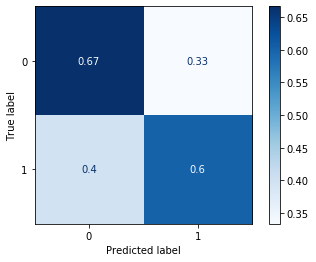

In [25]:
plot_confusion_matrix(val_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

In [26]:
print(accuracy_score(pred_v,y_v_test))

0.6408839779005525


### K Fold Cross Validation:-

In [27]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(val_model,valence_dataset,valence_label,scoring='accuracy',cv=cvkfold).mean()*100

64.04411764705881

### Leave One Out Cross Validation:- 

In [28]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(valence_dataset)
no_splits

904

In [29]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(val_model,valence_dataset,valence_label,scoring='accuracy',cv=cvloocv).mean()*100

63.115320796460175

## Dominance

In [30]:
dom_model.fit(x_d_train,np.array(y_d_train))

SVC(C=10)

In [31]:
pred_d = dom_model.predict(x_d_test)
print(classification_report(y_d_test,pred_d))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       120
           1       0.63      0.63      0.63       123

    accuracy                           0.63       243
   macro avg       0.63      0.63      0.63       243
weighted avg       0.63      0.63      0.63       243



In [32]:
confusion_matrix(y_d_test,pred_d)

array([[74, 46],
       [45, 78]], dtype=int64)

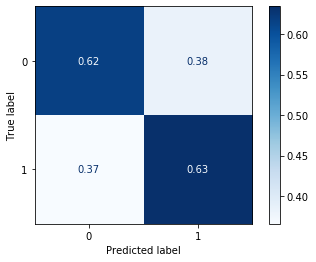

In [33]:
plot_confusion_matrix(dom_model,x_d_test,y_d_test,normalize='true',cmap=plt.cm.Blues)

In [34]:
print(accuracy_score(pred_d,y_d_test))

0.6255144032921811


### K Fold Cross Validation:-


In [35]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(dom_model,dominance_dataset,dominance_label,scoring='accuracy',cv=cvkfold).mean()*100

61.39917695473252

### Leave One Out Cross Validation:-

In [36]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(dominance_dataset)
no_splits

808

In [37]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(dom_model,dominance_dataset,dominance_label,scoring='accuracy',cv=cvloocv).mean()*100

61.010777003626295

## Liking

In [38]:
lik_model.fit(x_l_train,np.array(y_l_train))

SVC(C=10)

In [39]:
pred_l = lik_model.predict(x_l_test)
print(classification_report(y_l_test,pred_l))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       165
           1       0.76      0.75      0.76       163

    accuracy                           0.76       328
   macro avg       0.76      0.76      0.76       328
weighted avg       0.76      0.76      0.76       328



In [40]:
confusion_matrix(y_l_test,pred_l)

array([[127,  38],
       [ 40, 123]], dtype=int64)

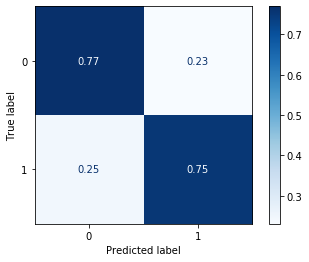

In [41]:
plot_confusion_matrix(lik_model,x_l_test,y_l_test,normalize='true',cmap=plt.cm.Blues)

In [42]:
print(accuracy_score(pred_l,y_l_test))

0.7621951219512195


### K Fold Cross Validation:-

In [43]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(lik_model,liking_dataset,liking_label,scoring='accuracy',cv=cvkfold).mean()*100

76.34146341463415

### Leave One Out Cross Validation:-

In [44]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(liking_dataset)
no_splits

1092

In [45]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(lik_model,liking_dataset,liking_label,scoring='accuracy',cv=cvloocv).mean()*100

76.88566514786027